<a href="https://colab.research.google.com/github/aditibadkur/aeravat_gg/blob/ml/RealTimeAlert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, f1_score, ConfusionMatrixDisplay, precision_score, recall_score

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.optimizers import SGD,Adam

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
df = pd.read_csv('/content/gdrive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df_columns = df.columns.tolist()
for column in df_columns:
    print(f"{column} unique values : {df[column].unique()}")

customerID unique values : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender unique values : ['Female' 'Male']
SeniorCitizen unique values : [0 1]
Partner unique values : ['Yes' 'No']
Dependents unique values : ['No' 'Yes']
tenure unique values : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService unique values : ['No' 'Yes']
MultipleLines unique values : ['No phone service' 'No' 'Yes']
InternetService unique values : ['DSL' 'Fiber optic' 'No']
OnlineSecurity unique values : ['No' 'Yes' 'No internet service']
OnlineBackup unique values : ['Yes' 'No' 'No internet service']
DeviceProtection unique values : ['No' 'Yes' 'No internet service']
TechSupport unique values : ['No' 'Yes' 'No internet service']
StreamingTV unique values : ['No' 'Yes' 'No internet service']


In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [7]:
df.isnull().sum()*100/df.shape[0]

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

In [8]:
df.dropna(inplace=True)

In [9]:
feature_le = ["Partner","Dependents","PhoneService", "Churn","PaperlessBilling"]
def label_encoding(df,features):
    for i in features:
        df[i] = df[i].map({"Yes":1, "No":0})
    return df

df = label_encoding(df,feature_le)
df["gender"] = df["gender"].map({"Female":1, "Male":0})

In [10]:
features_ohe = ["MultipleLines","InternetService","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]
df_ohe = pd.get_dummies(df, columns=features_ohe)

In [11]:
features_mms = ["tenure","MonthlyCharges","TotalCharges"]

df_mms = pd.DataFrame(df_ohe, columns=features_mms)
df_remaining = df_ohe.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms, index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [12]:
X = df.drop(columns = ["Churn","customerID"])
y = df.Churn

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 40), (2110, 40), (4922,), (2110,))

In [13]:
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [14]:
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [15]:
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      27.89
1      42.25
2      51.05
3      56.09
4      60.26
5      63.72
6      67.05
7      70.28
8      73.43
9      76.43
10     79.31
11     82.13
12     84.65
13     87.13
14     89.42
15     91.69
16     93.80
17     95.80
18     97.74
19     98.95
20     99.85
21    100.00
22    100.00
23    100.00
24    100.00
25    100.00
26    100.00
27    100.00
28    100.00
29    100.00
30    100.00
31    100.00
32    100.00
33    100.00
34    100.00
35    100.00
36    100.00
37    100.00
38    100.00
39    100.00
dtype: float64


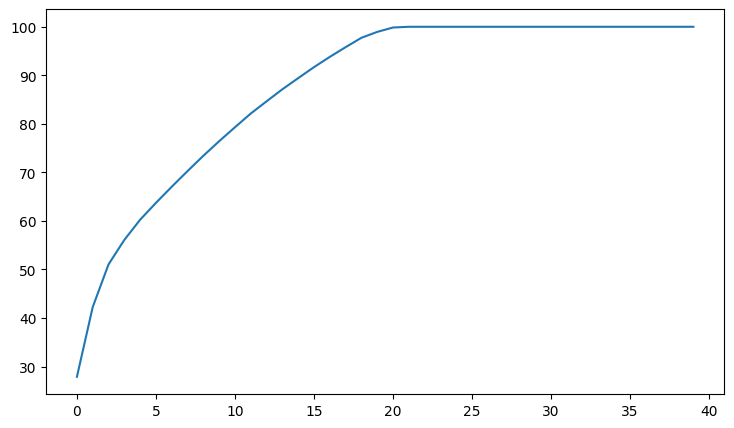

In [16]:
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [17]:
# create pipeline
PCA_VARS = 20
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [18]:
# fit model
pipeline.fit(X_train, y_train)

# check score on train data
pipeline.score(X_train, y_train)

0.749288906948395

In [19]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]

[[1099  450]
 [ 122  439]]
Sensitivity: 	0.78
Specificity: 	0.71


In [20]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.734254
1    0.265746
Name: Churn, dtype: float64

In [21]:
pca = PCA()
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

steps = [("scaler", StandardScaler()),
         ("pca", pca),
         ("logistic", logistic)
        ]

pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [20, 30], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 7, shuffle = True, random_state = 5)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [22]:
# fit model
model.fit(X_train, y_train)

Fitting 7 folds for each of 16 candidates, totalling 112 fits


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=5, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l2'],
                         'pca__n_components': [20, 30]},
             scoring='roc_auc', verbose=1)

In [23]:

pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,mean_test_score,std_test_score,rank_test_score
0,0.154075,0.028421,0.015792,0.006390,0.1,l2,20,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.839262,0.839241,0.825504,0.831737,0.858133,0.849469,0.852925,0.842324,0.010871,9
1,0.324856,0.074456,0.020215,0.007688,0.1,l2,30,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.842903,0.842412,0.826695,0.835365,0.863533,0.850723,0.854974,0.845229,0.011429,8
2,0.190514,0.036550,0.011837,0.004970,0.5,l2,20,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.839293,0.839365,0.825514,0.831447,0.857760,0.849324,0.852603,0.842187,0.010768,10
3,0.284177,0.074602,0.024821,0.005815,0.5,l2,30,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.844547,0.844329,0.826695,0.838836,0.864963,0.851459,0.855140,0.846567,0.011336,7
4,0.179051,0.029147,0.021508,0.004251,1,l2,20,"{'logistic__C': 1, 'logistic__penalty': 'l2', ...",0.839334,0.839365,0.825638,0.831395,0.857605,0.849210,0.852644,0.842170,0.010709,11
5,0.228480,0.084912,0.014014,0.008985,1,l2,30,"{'logistic__C': 1, 'logistic__penalty': 'l2', ...",0.845023,0.844391,0.826208,0.839520,0.865450,0.851573,0.855203,0.846767,0.011509,6
6,0.118504,0.047158,0.012263,0.006285,2,l2,20,"{'logistic__C': 2, 'logistic__penalty': 'l2', ...",0.839293,0.839375,0.825545,0.831395,0.857605,0.849179,0.852582,0.842139,0.010719,15
7,0.162495,0.054217,0.011186,0.005331,2,l2,30,"{'logistic__C': 2, 'logistic__penalty': 'l2', ...",0.845054,0.844505,0.826063,0.840204,0.865885,0.851770,0.855130,0.846945,0.011588,5
8,0.141729,0.033270,0.014906,0.005208,3,l2,20,"{'logistic__C': 3, 'logistic__penalty': 'l2', ...",0.839262,0.839417,0.825545,0.831426,0.857574,0.849190,0.852561,0.842139,0.010706,16
9,0.242935,0.049549,0.015831,0.008812,3,l2,30,"{'logistic__C': 3, 'logistic__penalty': 'l2', ...",0.845344,0.844433,0.826125,0.840453,0.866082,0.851905,0.855213,0.847079,0.011610,4


In [24]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8472984137559807
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2', 'pca__n_components': 30}


In [25]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[729 820]
 [ 30 531]]
Sensitivity: 	0.95
Specificity: 	0.47
AUC:    	 0.84


In [26]:
X.shape

(7032, 40)

In [27]:
X_test.shape

(2110, 40)

In [28]:
y_pred.shape

(2110,)

In [29]:
X_test["churn_prediction"] = y_pred

In [30]:
X_test

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines_No,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn_prediction
4221,0.000000,0.010448,0.000058,0,0,0,0,1,0,1,...,1,0,1,0,0,0,1,0,0,1
1820,0.070423,0.272637,0.035155,1,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,1
2375,0.985915,0.909950,0.909930,1,1,1,0,1,1,1,...,0,1,0,0,1,1,0,0,0,0
5462,0.887324,0.516418,0.514874,0,0,1,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
1791,0.605634,0.430348,0.311955,1,0,1,0,1,1,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4685,0.633803,0.901990,0.557985,1,0,1,0,1,1,0,...,0,1,0,0,1,0,1,0,0,1
4768,0.985915,0.015423,0.158049,0,1,1,1,1,0,1,...,1,0,0,0,1,0,1,0,0,0
6150,0.436620,0.724378,0.329183,0,0,0,0,1,0,1,...,0,1,1,0,0,0,0,1,0,1
3234,0.323944,0.014428,0.050052,1,0,1,1,1,0,1,...,1,0,0,0,1,0,0,0,1,0


In [34]:
X_test.to_csv('LgoiRegg')

Text(0.5, 1.0, 'Feature Importance of Our Logistic Regression Model')

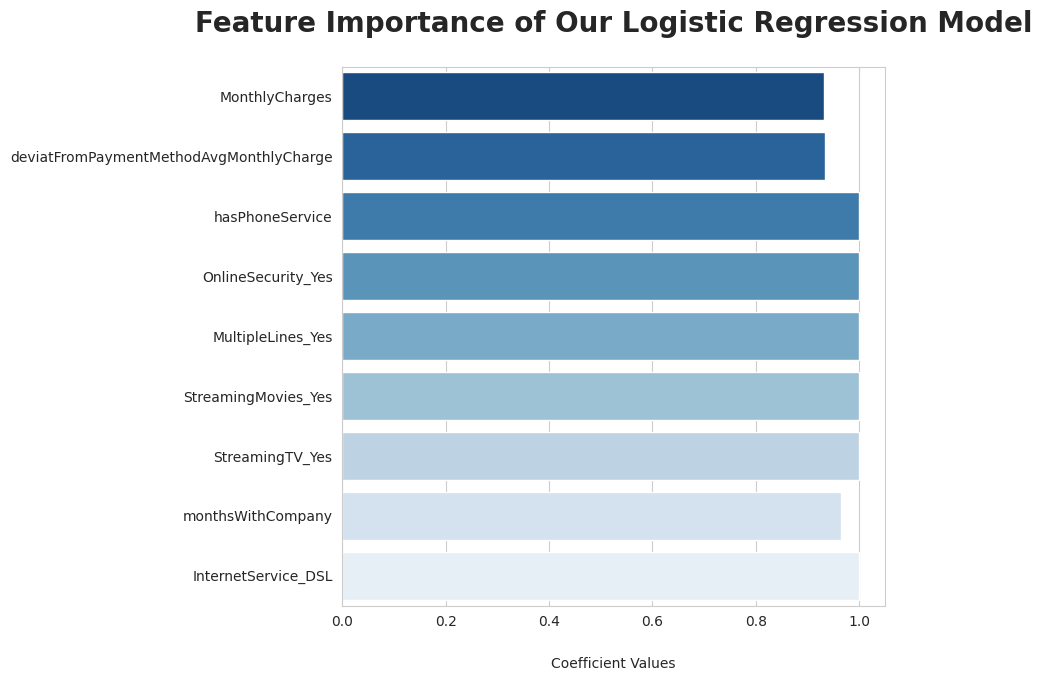

In [38]:
# Get the feature weights of our Logistic Regression model
lr_coefficients = X_test

# DataFrame lacks column names; put them back
lr_coefficients.columns = X_test.columns

# Reshape (wide --> long format) and
# filter the data to get features our Logistic Regression model found important
lr_coefficients = pd.melt(lr_coefficients, var_name='Features', value_name='Coefficients')
lr_coefficients.sort_values('Coefficients', ascending=False, inplace=True)
lr_important_features = lr_coefficients[np.abs(lr_coefficients['Coefficients']) > 0.9]
lr_important_features

# Reshape (long --> wide format) in order to get our data in a form
# such that Seaborn will be able to create a horizontal barplot
lr_important_features = lr_important_features.pivot_table(columns='Features', values='Coefficients')

# Manual ordering of columns to create visualization
col_order = ['MonthlyCharges', 'TotalCharges', 'PhoneService',
             'OnlineSecurity_Yes', 'MultipleLines_Yes', 'StreamingMovies_Yes',
             'StreamingTV_Yes', 'tenure', 'PhoneService', 'InternetService_DSL' ]
lr_important_features = lr_important_features[col_order]

# Rename columns for enhanced readability
rename_mapping = {'TotalCharges': 'deviatFromPaymentMethodAvgMonthlyCharge',
                  'PhoneService': 'noPhoneService',
                  'OnlineSecurity': 'hasOnlineSecurity',
                  'MultipleLines': 'numTelephoneLines',
                  'StreamingMovies': 'streamsMovies',
                  'StreamingTV': 'streamsTV',
                  'tenure': 'monthsWithCompany',
                  'PhoneService': 'hasPhoneService',
                  'InternetService': 'internetServiceQuality'}
lr_important_features.rename(columns=rename_mapping, inplace=True)


# Visualize the results
sns.set_style('whitegrid')
plt.figure(figsize=(7,7))
sns.barplot(data=lr_important_features, palette='Blues_r', orient='h')
plt.xlabel('Coefficient Values', labelpad=20)
plt.ylabel('')
plt.title('Feature Importance of Our Logistic Regression Model',
          pad=25, fontsize=20, fontweight='bold')